<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 1 - Text Representation </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the first module (Module 1). The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques that were described in the theory portion of the lecture..**



**Guidelines**
* Download `ShakespeareSonnets.txt` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 1 - Text Representation (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Reading the dataset 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `ShakespeareSonnets.txt` into a sting called `sonnets` and perform the following: 

> **Q1.1.** Tokenize the text into individual words or individual tokens and store the result into a variable called `text_tokens`. Make sure to ignore the punctuation characters. Then print the results.

> **Q1.2.** Tokenize the text into individual sentences. Then print the results.

> **Q1.3.**  Encode `text_tokens` using One-Hot Encoding approach and store the encoded tokens into a Dataframe called `one_hot_df`.

> **Q1.4.** Represent the `one_hot_df` using a Bag of words  

> **Q1.5.** Remove the stopwords from the `sonnets` variable and store the results in a variable called `filtered_sonnets`

> **Q1.6.** Create a list called `sonnets_corpus` by splitting the `sonnets` variable into individual sonnets (The result should be 144 sonnets). Then, perform a `TF/IDF` on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.  

> **Q1.7.** Using `nltk.util`'s ngrams module, find the 4-grams of the `sonnets`variable.

In [7]:
import warnings 
warnings.filterwarnings ('ignore')

import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from nltk.util import ngrams

import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm 
tqdm.pandas()

import watermark

%load_ext watermark 
%matplotlib inline

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aswad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
%watermark 

Last updated: 2024-09-10T18:34:42.846384-04:00

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



## read the content


In [10]:
file_path = 'ShakespearesSonnets.txt'
# sonnets = pd.read_csv(file_path,delimiter = "\t")
# sonnets.head()
sonnets = open(file_path,'r').read()



In [11]:
print(sonnets)

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1




1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaudy spring
Within thine own bud buriest thy content
And, tender churl, mak'st waste in niggarding.
  Pity the world, or else this glutton be--
  To eat the world's due, by the grave and thee.

2

When forty winters shall besiege thy brow
And dig deep trenches in thy beauty's field,
Thy youth's proud live

In [12]:
# Sonnets
# by William Shakespeare
# Edited by Barbara A. Mowat and Paul Werstine
#   with Michael Poston and Rebecca Niles
# Folger Shakespeare Library
# https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
# Created on Jul 31, 2015, from FDT version 0.9.0.1

# Remove the above text which is not a sonnet
sonnets = sonnets[268:]

In [13]:
print(sonnets)


1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaudy spring
Within thine own bud buriest thy content
And, tender churl, mak'st waste in niggarding.
  Pity the world, or else this glutton be--
  To eat the world's due, by the grave and thee.

2

When forty winters shall besiege thy brow
And dig deep trenches in thy beauty's field,
Thy youth's proud livery, so gazed on now,
Will be a tattered weed of small worth held.
Then being asked where all thy beauty lies,
Where all the treasure of thy lusty days,
To say within thine own deep-sunken eyes
Were an all-eating shame and thriftless praise.
How much more praise deserv

**Q1.1.** Tokenize the sonnets into individual words or tokens.

* **Store the result:** in a variable named `text_tokens`.
* **Ignore punctuation:** when tokenizing.
* **Print the results:** `text_tokens`.

In [15]:
text_tokens = nltk.word_tokenize(sonnets)
# print(text_tokens)

In [16]:
def tokenize(text, preserve_case=True):
    # Create a translation table that maps each punctuation character to None
    translator = str.maketrans('', '', string.punctuation)
    text_words = []
    
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):
        # Remove punctuation from the word
        clean_word = word.translate(translator)
        
        # Skip empty words (those that were purely punctuation)
        if not clean_word:
            continue
        
        # Preserve case or convert to lowercase
        if preserve_case:
            text_words.append(clean_word)
        else:
            text_words.append(clean_word.lower())
    
    return text_words

In [17]:
# ignoring punctuations
text_tokens = (tokenize(sonnets))
print(text_tokens)


['1', 'From', 'fairest', 'creatures', 'we', 'desire', 'increase', 'That', 'thereby', 'beauty', 's', 'rose', 'might', 'never', 'die', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'Feed', 'st', 'thy', 'light', 's', 'flame', 'with', 'self', 'substantial', 'fuel', 'Making', 'a', 'famine', 'where', 'abundance', 'lies', 'Thyself', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', 'Thou', 'that', 'art', 'now', 'the', 'world', 's', 'fresh', 'ornament', 'And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', 'Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'And', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding', 'Pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', 'To', 'eat', 'the', 'world', 's', 'due', 'by', 'the', 'grave', 'and', 'thee', '2', 'When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow'

**Q1.2.*** Tokenize into Individual sentences:
* **Split: the text into individual sentences.
* **Print: the resulting sentences.

In [19]:
sent_tokens = nltk.sent_tokenize(sonnets)
print(sent_tokens)

["\n1\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut, as the riper should by time decease,\nHis tender heir might bear his memory.", "But thou, contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.", "Thou that art now the world's fresh ornament\nAnd only herald to the gaudy spring\nWithin thine own bud buriest thy content\nAnd, tender churl, mak'st waste in niggarding.", "Pity the world, or else this glutton be--\n  To eat the world's due, by the grave and thee.", "2\n\nWhen forty winters shall besiege thy brow\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tattered weed of small worth held.", 'Then being asked where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say within thine own deep-sunken eyes\nWere an all-eating shame and thriftless 

**Q1.3.** One-Hot Encoding:
* Encode: text_tokens using one-hot encoding.
* Store: the encoded tokens in a DataFrame called one_hot_df.

In [21]:
one_hot_df = pd.get_dummies(text_tokens)
one_hot_df

,1,10,100,101,102,103,104,105,106,107,...,yore,you,young,youngly,your,yours,yourself,youth,youthful,zealous
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18311,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q1.4.** Bag of Words Representation:
* Represent: one_hot_df using a bag of words approach.

In [23]:
word_dict = dict(zip(one_hot_df.columns, np.arange(one_hot_df.shape[1])))
word_dict

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '103': 5,
 '104': 6,
 '105': 7,
 '106': 8,
 '107': 9,
 '108': 10,
 '109': 11,
 '11': 12,
 '110': 13,
 '111': 14,
 '112': 15,
 '113': 16,
 '114': 17,
 '115': 18,
 '116': 19,
 '117': 20,
 '118': 21,
 '119': 22,
 '12': 23,
 '120': 24,
 '121': 25,
 '122': 26,
 '123': 27,
 '124': 28,
 '125': 29,
 '126': 30,
 '127': 31,
 '128': 32,
 '129': 33,
 '13': 34,
 '130': 35,
 '131': 36,
 '132': 37,
 '133': 38,
 '134': 39,
 '135': 40,
 '136': 41,
 '137': 42,
 '138': 43,
 '139': 44,
 '14': 45,
 '140': 46,
 '141': 47,
 '142': 48,
 '143': 49,
 '144': 50,
 '145': 51,
 '146': 52,
 '147': 53,
 '148': 54,
 '149': 55,
 '15': 56,
 '150': 57,
 '151': 58,
 '152': 59,
 '153': 60,
 '154': 61,
 '1599': 62,
 '16': 63,
 '17': 64,
 '18': 65,
 '19': 66,
 '2': 67,
 '20': 68,
 '21': 69,
 '22': 70,
 '23': 71,
 '24': 72,
 '25': 73,
 '26': 74,
 '27': 75,
 '28': 76,
 '29': 77,
 '3': 78,
 '30': 79,
 '31': 80,
 '32': 81,
 '33': 82,
 '34': 83,
 '35': 84,
 '36': 85,
 '37': 86,

In [24]:
pd.DataFrame(one_hot_df.sum(), columns=['Count'])

,Count
1,1
10,1
100,1
101,1
102,1
...,...
yours,5
yourself,9
youth,17
youthful,2


**Q1.5.** Remove Stopwords:
* Remove: stopwords from the sonnets variable.
* Store: the filtered sonnets in a variable called filtered_sonnets

In [26]:
stop_words = set(stopwords.words('english'))
tokens = tokenize(sonnets) 
filtered_sentence = [word if word.lower() not in stop_words else "" for word in tokens] 
pd.DataFrame((zip(tokens, filtered_sentence)), columns=['Original', 'Filtered']).set_index( 'Original')

,Filtered
Original,
1,1
From,
fairest,fairest
creatures,creatures
we,
...,...
one,one
out,
sig,sig


In [27]:
filtered_sentence

['1',
 '',
 'fairest',
 'creatures',
 '',
 'desire',
 'increase',
 '',
 'thereby',
 'beauty',
 '',
 'rose',
 'might',
 'never',
 'die',
 '',
 '',
 '',
 'riper',
 '',
 '',
 'time',
 'decease',
 '',
 'tender',
 'heir',
 'might',
 'bear',
 '',
 'memory',
 '',
 'thou',
 'contracted',
 '',
 'thine',
 '',
 'bright',
 'eyes',
 'Feed',
 'st',
 'thy',
 'light',
 '',
 'flame',
 '',
 'self',
 'substantial',
 'fuel',
 'Making',
 '',
 'famine',
 '',
 'abundance',
 'lies',
 'Thyself',
 'thy',
 'foe',
 '',
 'thy',
 'sweet',
 'self',
 '',
 'cruel',
 'Thou',
 '',
 'art',
 '',
 '',
 'world',
 '',
 'fresh',
 'ornament',
 '',
 '',
 'herald',
 '',
 '',
 'gaudy',
 'spring',
 'Within',
 'thine',
 '',
 'bud',
 'buriest',
 'thy',
 'content',
 '',
 'tender',
 'churl',
 'mak',
 'st',
 'waste',
 '',
 'niggarding',
 'Pity',
 '',
 'world',
 '',
 'else',
 '',
 'glutton',
 '',
 '',
 'eat',
 '',
 'world',
 '',
 'due',
 '',
 '',
 'grave',
 '',
 'thee',
 '2',
 '',
 'forty',
 'winters',
 'shall',
 'besiege',
 'thy',
 'br

**Q1.6.** TF-IDF:
* Split: sonnets into individual sonnets (144 sonnets).
* Create: a list called sonnets_corpus.
* Perform TF-IDF: on sonnets_corpus to get TF-IDF scores.


In [29]:
sonnets_corpus = nltk.sent_tokenize(sonnets)

In [30]:
len(sonnets_corpus)

675

In [31]:
import re
#  only match sonnet headers, assuming they start with numbers on new lines using regex.
sonnets_corpus = re.split(r'\n{2,}\d+\n{2,}', sonnets)
 
# Remove any empty strings from the resulting list
sonnets_corpus = [sonnet.strip() for sonnet in sonnets_corpus if sonnet.strip()]
 
# Check the number of sonnets
print(f"Number of sonnets: {len(sonnets_corpus)}")

Number of sonnets: 154


In [32]:
sonnets_corpus = [tokenize(doc, preserve_case=False) for doc in sonnets_corpus]

In [33]:
sonnets_corpus

[['1',
  'from',
  'fairest',
  'creatures',
  'we',
  'desire',
  'increase',
  'that',
  'thereby',
  'beauty',
  's',
  'rose',
  'might',
  'never',
  'die',
  'but',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'decease',
  'his',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'but',
  'thou',
  'contracted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  'feed',
  'st',
  'thy',
  'light',
  's',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel',
  'making',
  'a',
  'famine',
  'where',
  'abundance',
  'lies',
  'thyself',
  'thy',
  'foe',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  'thou',
  'that',
  'art',
  'now',
  'the',
  'world',
  's',
  'fresh',
  'ornament',
  'and',
  'only',
  'herald',
  'to',
  'the',
  'gaudy',
  'spring',
  'within',
  'thine',
  'own',
  'bud',
  'buriest',
  'thy',
  'content',
  'and',
  'tender',
  'churl',
  'mak',
  'st',
  'waste',
  'in',
  'niggarding',
  'pity',
  'the',
 

<Axes: xlabel='Samples', ylabel='Counts'>

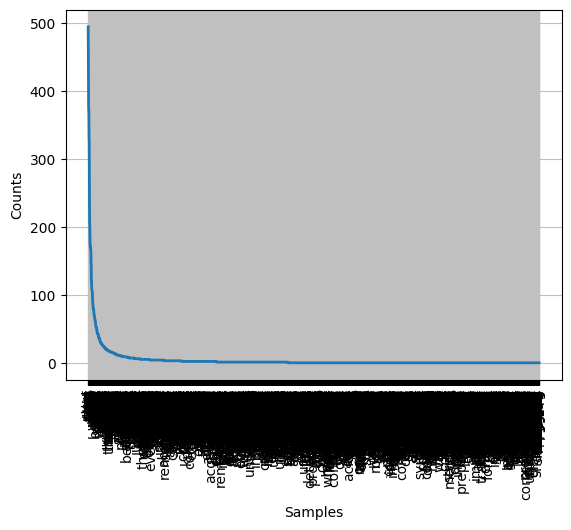

In [34]:
nlp = TextCollection(sonnets_corpus)
nlp.plot()

In [35]:
nlp.tf_idf('love', sonnets_corpus[3])

0.0

In [36]:
TFIDF = []

for doc in sonnets_corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
    
    TFIDF.append(current)

In [37]:
TFIDF

[{'1': 0.04457480179127106,
  'from': 0.00819538706407361,
  'fairest': 0.03230671009994459,
  'creatures': 0.03844075594560782,
  'we': 0.023354489642612906,
  'desire': 0.024197942561235253,
  'increase': 0.03230671009994459,
  'that': 0.0028629252957960635,
  'thereby': 0.03844075594560782,
  'beauty': 0.011711332174418772,
  's': 0.016362535359654734,
  'rose': 0.028718523302527204,
  'might': 0.03365413073423858,
  'never': 0.021220312148658146,
  'die': 0.022584477456863972,
  'but': 0.00595526082515421,
  'as': 0.006606134170488832,
  'the': 0.006991742865939812,
  'riper': 0.03844075594560782,
  'should': 0.014775723649797833,
  'by': 0.015266643053415789,
  'time': 0.011498079505577529,
  'decease': 0.03485256914819044,
  'his': 0.01759117406334653,
  'tender': 0.05743704660505441,
  'heir': 0.03485256914819044,
  'bear': 0.021876134911080463,
  'memory': 0.02735435799432138,
  'thou': 0.011154572657511078,
  'contracted': 0.03844075594560782,
  'to': 0.0018883532993023968,
  

**Q1.7.** 4-Grams:
*  4-grams of  sonnets variable using nltk.util.ngrams.

In [39]:
def get_ngrams(text, length):
    from nltk.util import ngrams
    
    n_grams = ngrams(tokenize(text), length)
    return [' '.join(grams) for grams in n_grams]

In [40]:
get_ngrams(sonnets.lower(), 4)

['1 from fairest creatures',
 'from fairest creatures we',
 'fairest creatures we desire',
 'creatures we desire increase',
 'we desire increase that',
 'desire increase that thereby',
 'increase that thereby beauty',
 'that thereby beauty s',
 'thereby beauty s rose',
 'beauty s rose might',
 's rose might never',
 'rose might never die',
 'might never die but',
 'never die but as',
 'die but as the',
 'but as the riper',
 'as the riper should',
 'the riper should by',
 'riper should by time',
 'should by time decease',
 'by time decease his',
 'time decease his tender',
 'decease his tender heir',
 'his tender heir might',
 'tender heir might bear',
 'heir might bear his',
 'might bear his memory',
 'bear his memory but',
 'his memory but thou',
 'memory but thou contracted',
 'but thou contracted to',
 'thou contracted to thine',
 'contracted to thine own',
 'to thine own bright',
 'thine own bright eyes',
 'own bright eyes feed',
 'bright eyes feed st',
 'eyes feed st thy',
 'feed 

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 


## Reflection:
*This practical lab activity was an experience that incresead my appreciate for the theorotical session and gained a deeper understanding of NLP concepts and techniques for text representaion. I practised key concepts like tokenization, one hot ncoding, ignoring of punctuations, stop word removal, and n-gram analysis while familiarizing with popular NLP libraries like NLTK.*
 However an interesting exeperience was the fact that I hadd 155 sonnets , i realized I included a preamble which was not a sonnet and then I was able to get 154. but the question said I should expect 144. I think in my opinion 154 sonnet might be correct as opposed to 144.
## Importance:
*These skills will be crucial for working with text data in the real world. Based on this activity I am prepared to use it in various NLP applications like text classification, information retrieval, machine translation, and chatbots. By developing these techniques, I can contribute to the development of intelligent systems if I develop these skills and techniques for real world problems.*


<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab 1.ipynb** to the **Lab 1 - Text Representation (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection